In [2]:
import sys
PROJECT_ROOT = r"D:\proyectos\nanolang"
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

In [3]:
from graph.nodes import triage, txt_to_img, img_to_img
from graph.tools import State
from typing import Literal
from langgraph.graph import StateGraph, START, END

In [5]:
graph = StateGraph(State)

graph.add_node("triage", triage)
graph.add_node("txt_to_img", txt_to_img)
graph.add_node("img_to_img", img_to_img)

graph.add_edge(START, "triage")

def route(state: State) -> str:
    """Rutea después del nodo triage"""
    current = state.get("current_node", "triage")
    if current == "txt_to_img":
        return "txt_to_img"
    elif current == "img_to_img":
        return "img_to_img"
    else:
        return END

graph.add_conditional_edges(
    "triage",
    route,
    ["txt_to_img", "img_to_img", END]
)

graph.add_conditional_edges(
    "txt_to_img",
    lambda state: "triage" if state["back"] else END,
    ["triage", END]
)

graph.add_conditional_edges(
    "img_to_img",
    lambda state: "triage" if state["back"] else END,
    ["triage", END]
)

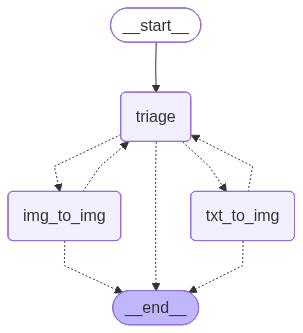

In [6]:
graph.compile()